**Importing the Libraries**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from scipy.stats.mstats import winsorize
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import random
from sklearn.neighbors import NearestNeighbors
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

**Importing and Inspecting the data**

In [6]:
df=pd.read_excel("/content/drive/MyDrive/Copie de Base de données - SNI (002) (2).xlsx")

In [ ]:
num_rows,num_cols= df.shape
print(f"The number of rows ={num_rows}")
print(f"The number of columns ={num_cols}")

The number of rows =1521
The number of columns =40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   numtiers                                 1521 non-null   int64         
 1   Annee                                    1521 non-null   int64         
 2   NUMTIERS_ANNEE                           1521 non-null   object        
 3   defaut                                   1521 non-null   int64         
 4   DATE_DE_CREATION_TIERS                   1521 non-null   datetime64[ns]
 5   DATE_DE_CREATION_ENTREP                  1521 non-null   datetime64[ns]
 6   CHIFFRE_AFFAIRES                         1521 non-null   float64       
 7   EXCEDENT_BRUT_EXPLOITATION               1521 non-null   float64       
 8   RESULTAT_EXPlOITATION                    1521 non-null   float64       
 9   RESULTAT_NET                             

In [ ]:
df.describe()

,numtiers,Annee,defaut,DATE_DE_CREATION_TIERS,DATE_DE_CREATION_ENTREP,CHIFFRE_AFFAIRES,EXCEDENT_BRUT_EXPLOITATION,RESULTAT_EXPlOITATION,RESULTAT_NET,FINANCEMENT_PERMANENT,...,PASSIF_CIRCULANT,TOTAL_ACTIF,TOTAL_PASSIF,DELAI_REGLEMENT_CLIENTS,DELAI_REGLEMENT_FOURNISSEURS,AUTO_FINANCEMENT,FRAIS_FINANCIERS,STOCK,Cote en bourse,Appartenance a un groupe
count,1.521000e+03,1521.000000,1521.000000,1521,1521,1.521000e+03,1.521000e+03,1.521000e+03,1.521000e+03,1.521000e+03,...,1.521000e+03,1.521000e+03,1.521000e+03,1521.000000,1521.000000,1.521000e+03,1.521000e+03,1.521000e+03,1521.000000,1521.000000
mean,5.200003e+12,2016.723208,0.034845,1998-12-19 20:37:23.786982272,1990-10-01 12:46:51.834319488,8.836712e+08,1.113634e+11,7.084423e+07,4.466026e+07,8.179797e+08,...,4.626149e+08,1.412505e+09,1.415091e+09,311.620966,964.072998,4.932546e+07,2.849152e+07,2.138622e+08,0.038133,0.621302
min,5.200000e+12,2015.000000,0.000000,1956-04-03 00:00:00,1919-02-08 00:00:00,2.407834e+05,-7.244920e+08,-9.228820e+08,-1.365167e+09,-2.181978e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-8.732279e+08,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,5.200001e+12,2016.000000,0.000000,1992-05-06 00:00:00,1979-10-29 00:00:00,2.201000e+08,9.256980e+06,6.046446e+06,1.626665e+06,5.395758e+07,...,7.979395e+07,2.112174e+08,2.099258e+08,57.900000,81.460000,2.364414e+06,2.854053e+06,2.540362e+07,0.000000,0.000000
50%,5.200001e+12,2017.000000,0.000000,2003-03-07 00:00:00,1996-06-12 00:00:00,3.666245e+08,2.337180e+07,1.626471e+07,6.890254e+06,1.243755e+08,...,1.621355e+08,3.926067e+08,3.924325e+08,106.300000,133.960000,9.076155e+06,6.881266e+06,6.403557e+07,0.000000,1.000000
75%,5.200002e+12,2018.000000,0.000000,2010-04-20 00:00:00,2004-09-13 00:00:00,7.300641e+08,6.484448e+07,4.753765e+07,2.619013e+07,3.521020e+08,...,3.277756e+08,8.910426e+08,8.882205e+08,181.430000,206.420000,2.902258e+07,1.574645e+07,1.641099e+08,0.000000,1.000000
max,5.200009e+12,2019.000000,1.000000,2018-07-04 00:00:00,2022-04-11 00:00:00,4.654680e+10,1.692210e+14,7.383194e+09,6.191285e+09,1.324880e+11,...,2.519313e+10,1.561210e+11,1.561210e+11,180968.090000,493807.570000,7.236063e+09,4.688320e+09,1.011758e+10,1.000000,1.000000
std,2.789631e+06,1.344695,0.183449,NaN,NaN,2.260292e+09,4.338997e+12,3.374614e+08,2.689441e+08,5.511221e+09,...,1.379349e+09,6.622539e+09,6.624351e+09,4705.694905,14470.674987,2.907861e+08,1.747951e+08,7.241134e+08,0.191580,0.485222


**Checking for missing values**

In [ ]:
df.isna().sum().sum()

0

On n'a pas de valeurs manquantes pour les variables numériques

**Exploratory data analysis**

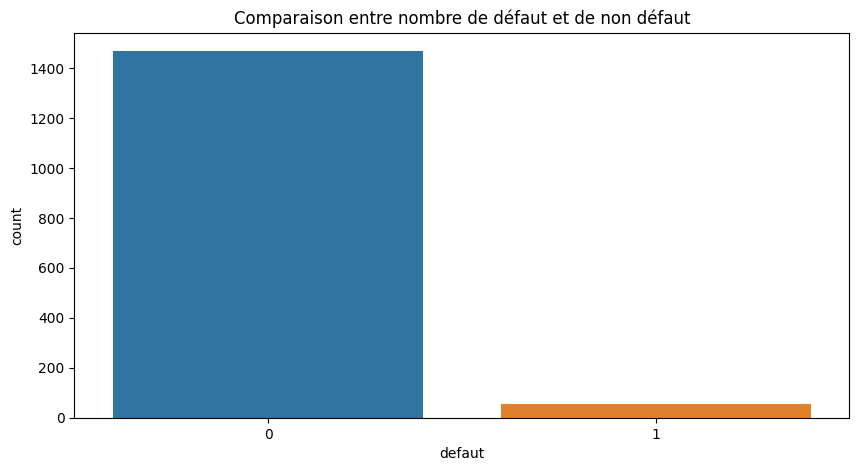

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'defaut', data = df)
plt.title("Comparaison entre nombre de défaut et de non défaut")
plt.show()

In [ ]:
df['defaut'].value_counts()

defaut
0    1468
1      53
Name: count, dtype: int64

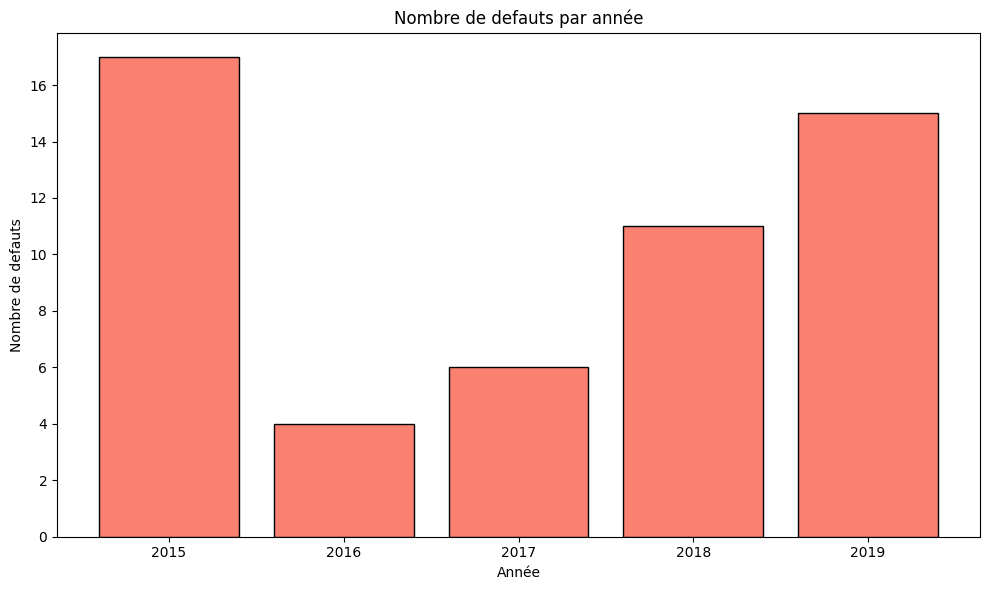

In [ ]:
df_defaut = df[df['defaut'] == 1]
defaulters_per_year = df_defaut.groupby('Annee').size()
plt.figure(figsize=(10, 6))
plt.bar(defaulters_per_year.index, defaulters_per_year.values, color='salmon', edgecolor='black')
plt.title('Nombre de defauts par année')
plt.xlabel('Année')
plt.ylabel('Nombre de defauts')
plt.tight_layout()
plt.show()

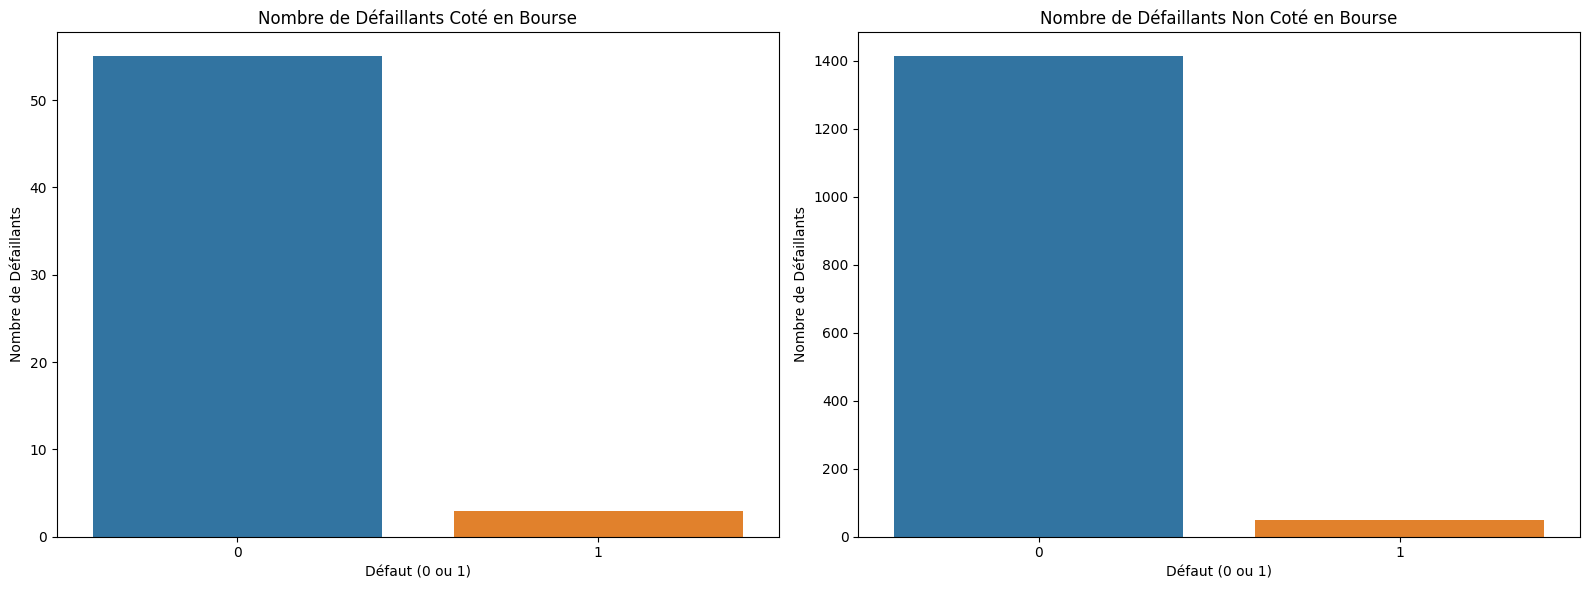

In [ ]:
df_grouped = df.groupby(['Cote en bourse', 'defaut']).size().reset_index(name='count')
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
df_cote = df_grouped[df_grouped['Cote en bourse'] == 1]
sns.barplot(x='defaut', y='count', data=df_cote)
plt.title('Nombre de Défaillants Coté en Bourse')
plt.xlabel('Défaut (0 ou 1)')
plt.ylabel('Nombre de Défaillants')
plt.subplot(1, 2, 2)
df_non_cote = df_grouped[df_grouped['Cote en bourse'] == 0]
sns.barplot(x='defaut', y='count', data=df_non_cote)
plt.title('Nombre de Défaillants Non Coté en Bourse')
plt.xlabel('Défaut (0 ou 1)')
plt.ylabel('Nombre de Défaillants')
plt.tight_layout()
plt.show()

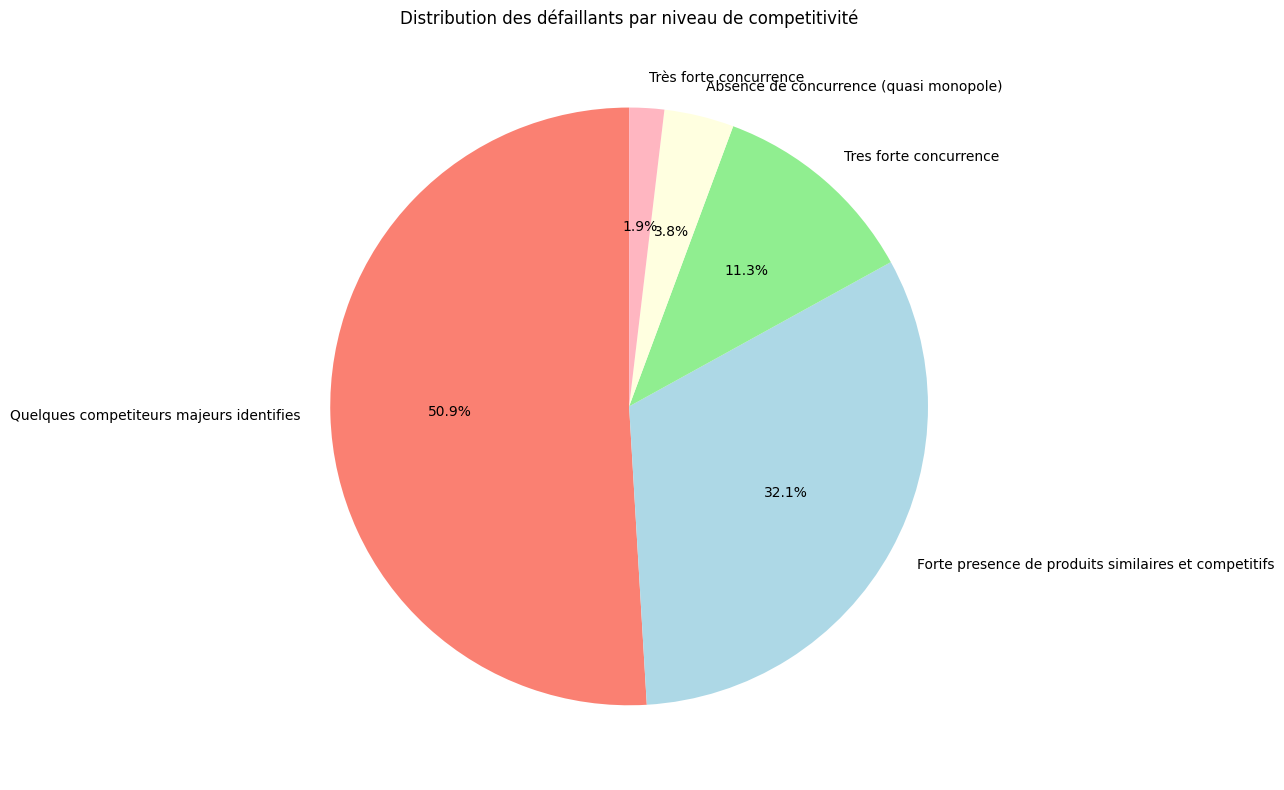

In [ ]:
df_defaut = df[df['defaut'] == 1]
value_counts = df_defaut['NIVEAU_COMPETITIVITE'].value_counts()
plt.figure(figsize=(12, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=['salmon', 'lightblue', 'lightgreen', 'lightyellow', 'lightpink', 'lightskyblue'])
plt.title("Distribution des défaillants par niveau de competitivité")
plt.tight_layout()
plt.show()

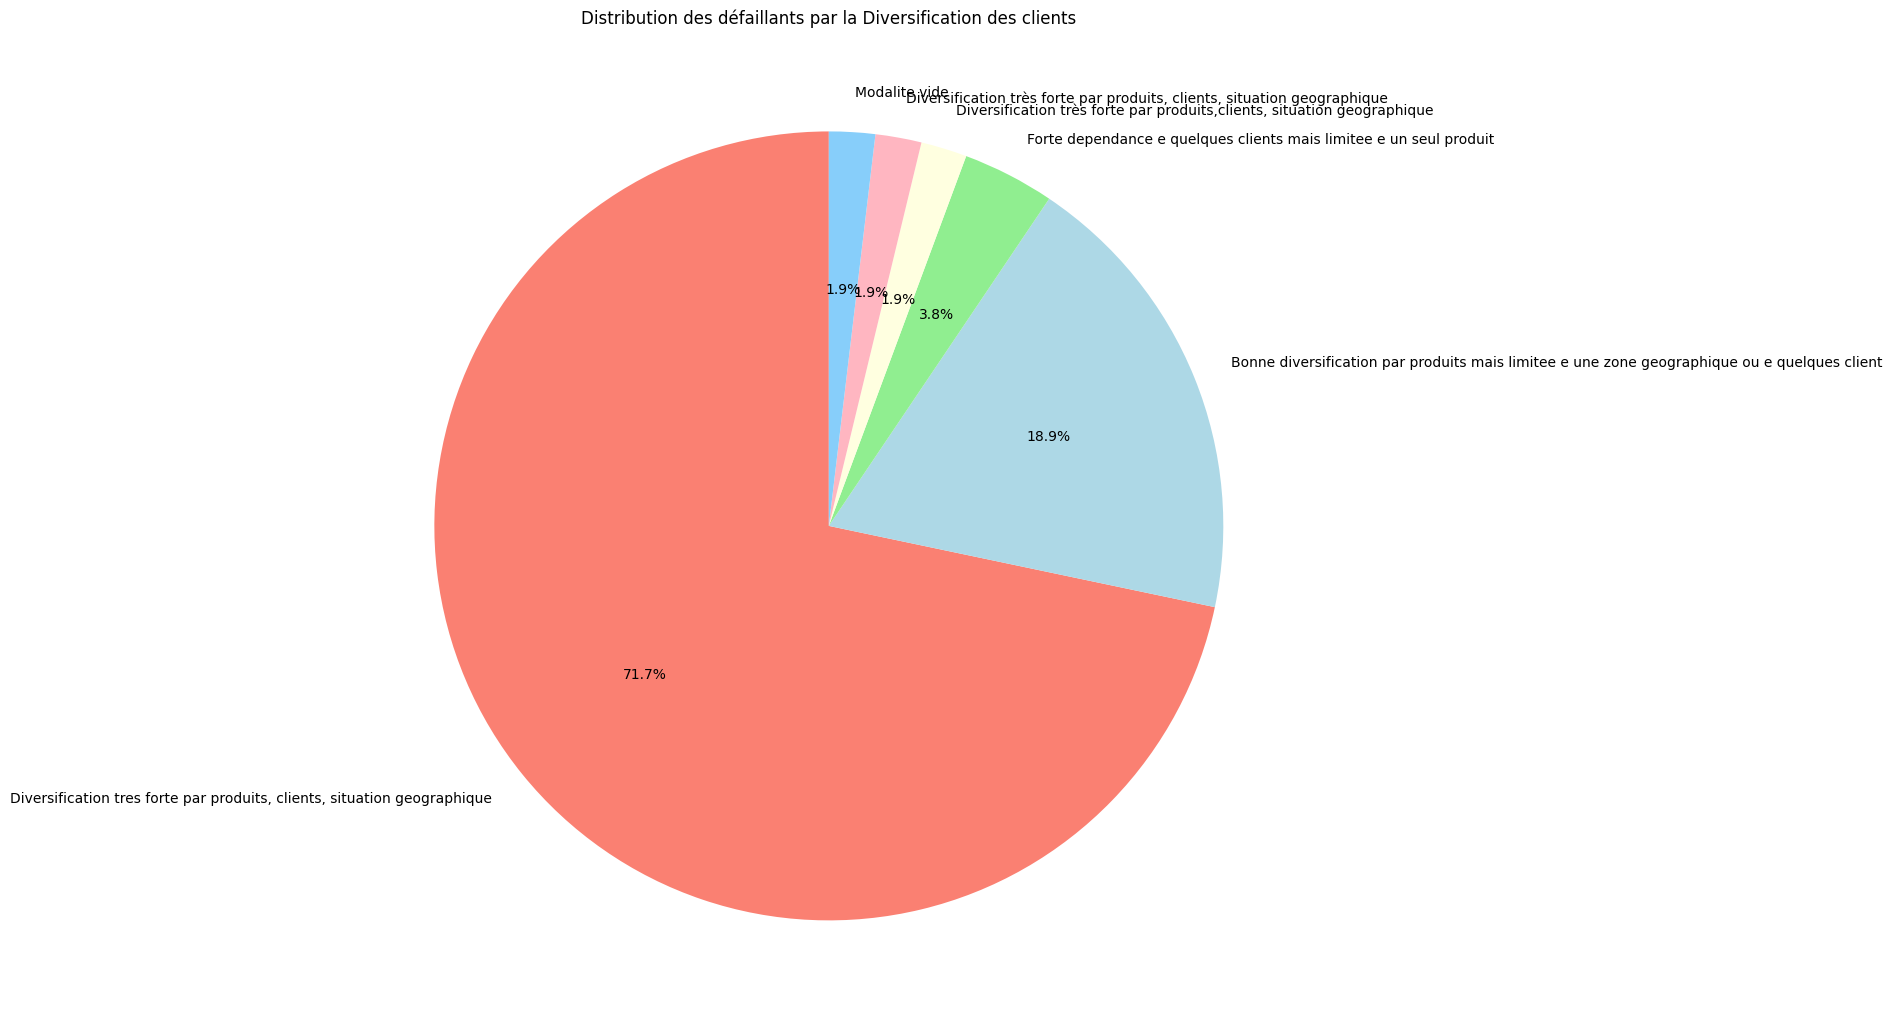

In [ ]:
df_defaut = df[df['defaut'] == 1]
value_counts = df_defaut['DIVERSITE_CLIENTS'].value_counts()
plt.figure(figsize=(18, 20))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=['salmon', 'lightblue', 'lightgreen', 'lightyellow', 'lightpink', 'lightskyblue'])
plt.title("Distribution des défaillants par la Diversification des clients")
plt.tight_layout()
plt.show()

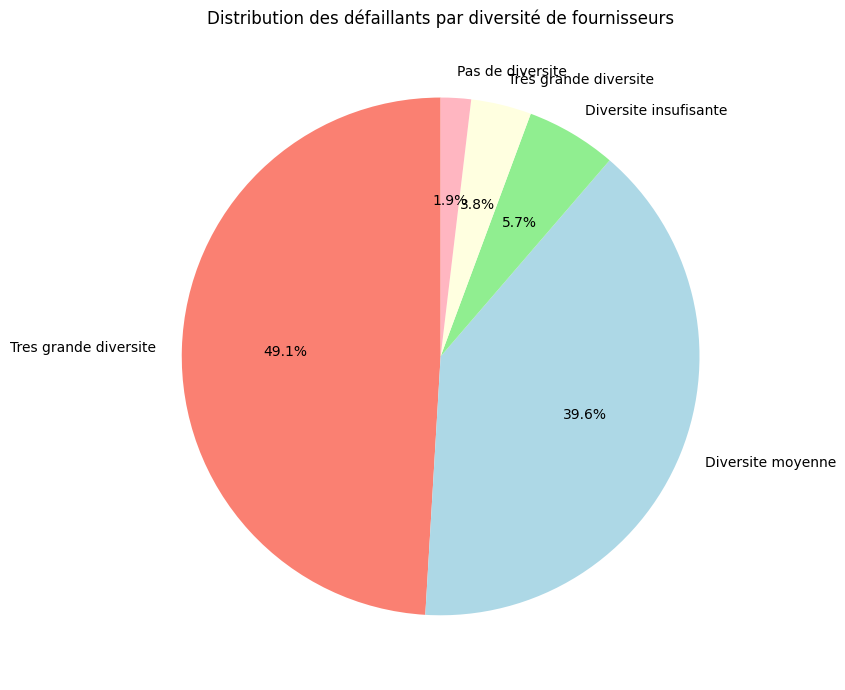

In [ ]:
df_defaut = df[df['defaut'] == 1]
value_counts = df_defaut['DIVERSITE_FOURNISSEURS'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=['salmon', 'lightblue', 'lightgreen', 'lightyellow', 'lightpink', 'lightskyblue'])
plt.title("Distribution des défaillants par diversité de fournisseurs")
plt.tight_layout()
plt.show()

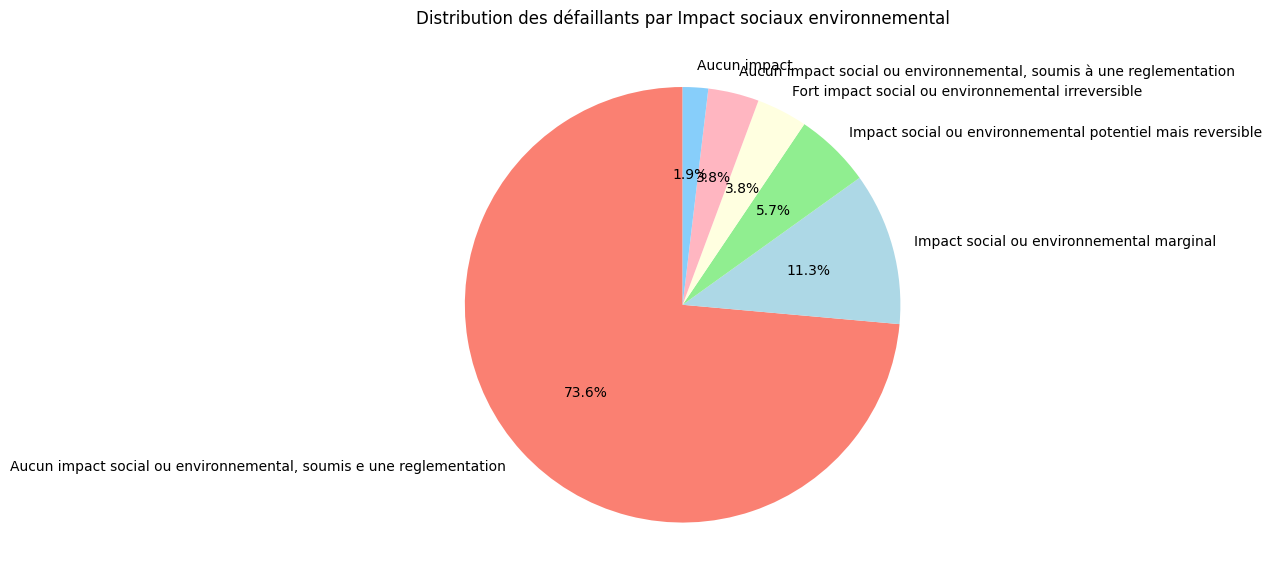

In [ ]:
df_defaut = df[df['defaut'] == 1]
value_counts = df_defaut['IMPACT_SOCIAUX_ENVIRONNEMENTAL'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=['salmon', 'lightblue', 'lightgreen', 'lightyellow', 'lightpink', 'lightskyblue'])
plt.title("Distribution des défaillants par Impact sociaux environnemental")
plt.tight_layout()
plt.show()

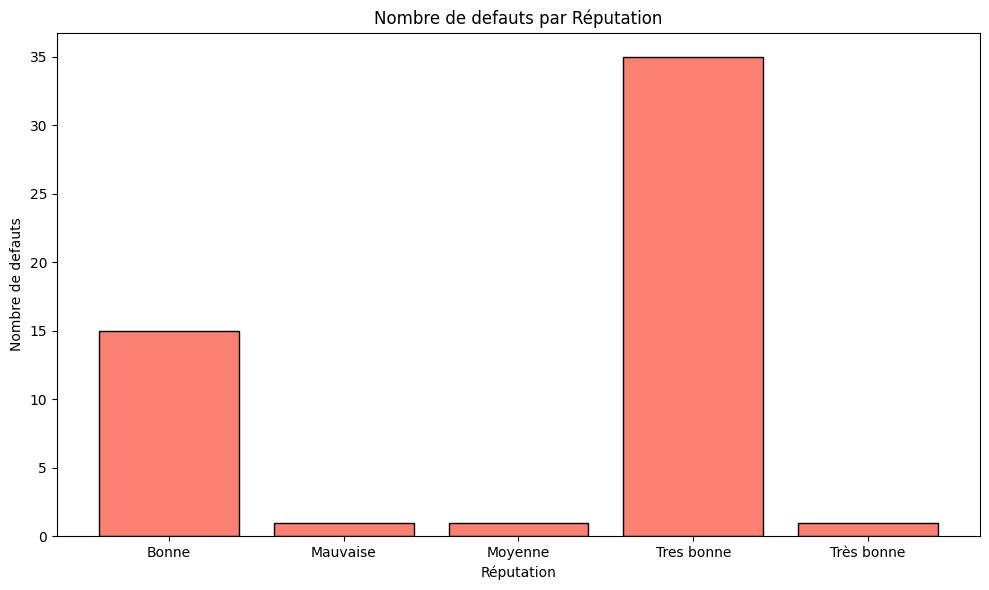

In [ ]:
df_defaut = df[df['defaut'] == 1]
defaulters_per_year = df_defaut.groupby('REPUTATION').size()
plt.figure(figsize=(10, 6))
plt.bar(defaulters_per_year.index, defaulters_per_year.values, color='salmon', edgecolor='black')
plt.title('Nombre de defauts par Réputation')
plt.xlabel('Réputation')
plt.ylabel('Nombre de defauts')
plt.tight_layout()
plt.show()

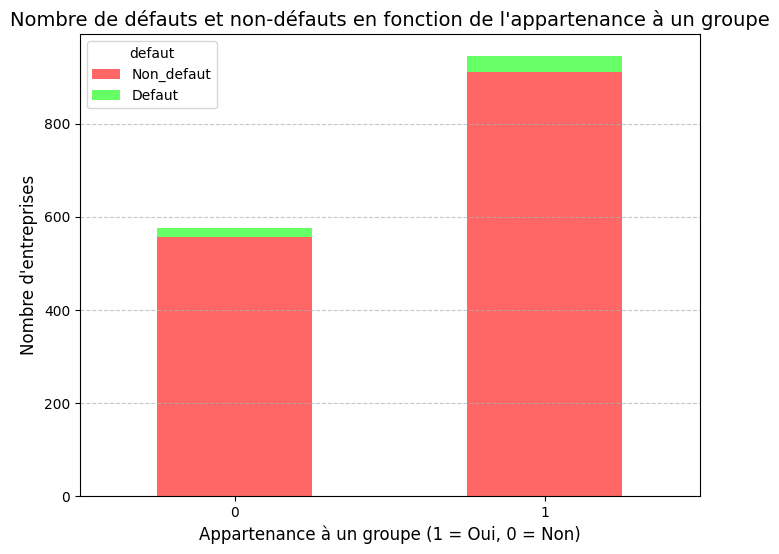

In [ ]:
group_defaut_count = df.groupby('Appartenance a un groupe')['defaut'].value_counts().unstack(fill_value=0).reset_index()
group_defaut_count.rename(columns={0: 'Non_defaut', 1: 'Defaut'}, inplace=True)
group_defaut_count.set_index('Appartenance a un groupe').plot(kind='bar', stacked=True, figsize=(8, 6), color=['#FF6666', '#66FF66'])
plt.title("Nombre de défauts et non-défauts en fonction de l'appartenance à un groupe", fontsize=14)
plt.xlabel("Appartenance à un groupe (1 = Oui, 0 = Non)", fontsize=12)
plt.ylabel("Nombre d'entreprises", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

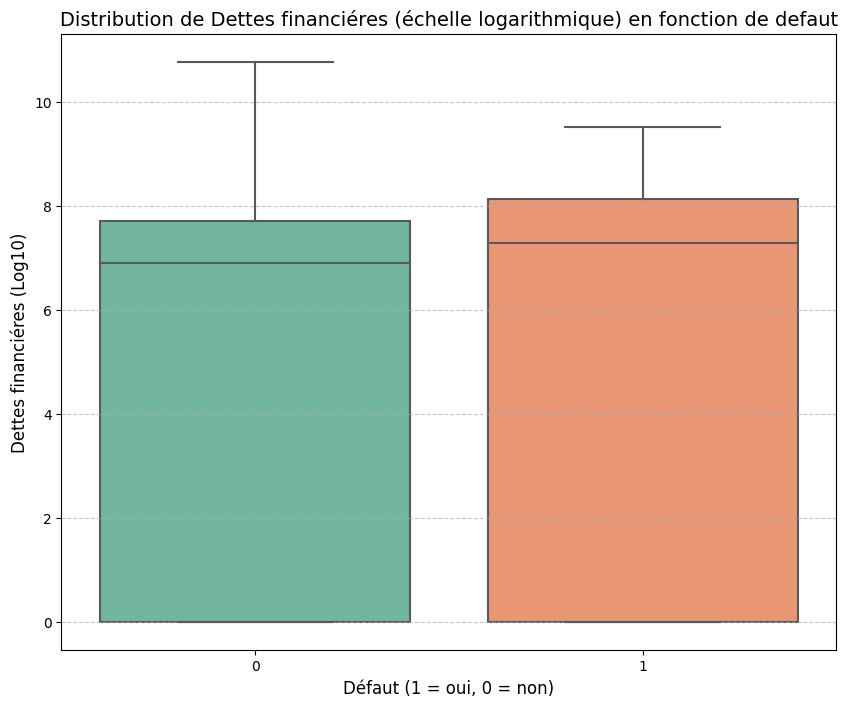

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='defaut', y=df['DETTE_FINANCIERE'].apply(lambda x: np.log10(max(x, 1))), data=df, palette='Set2')

plt.title("Distribution de Dettes financiéres (échelle logarithmique) en fonction de defaut", fontsize=14)
plt.xlabel("Défaut (1 = oui, 0 = non)", fontsize=12)
plt.ylabel("Dettes financiéres (Log10)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

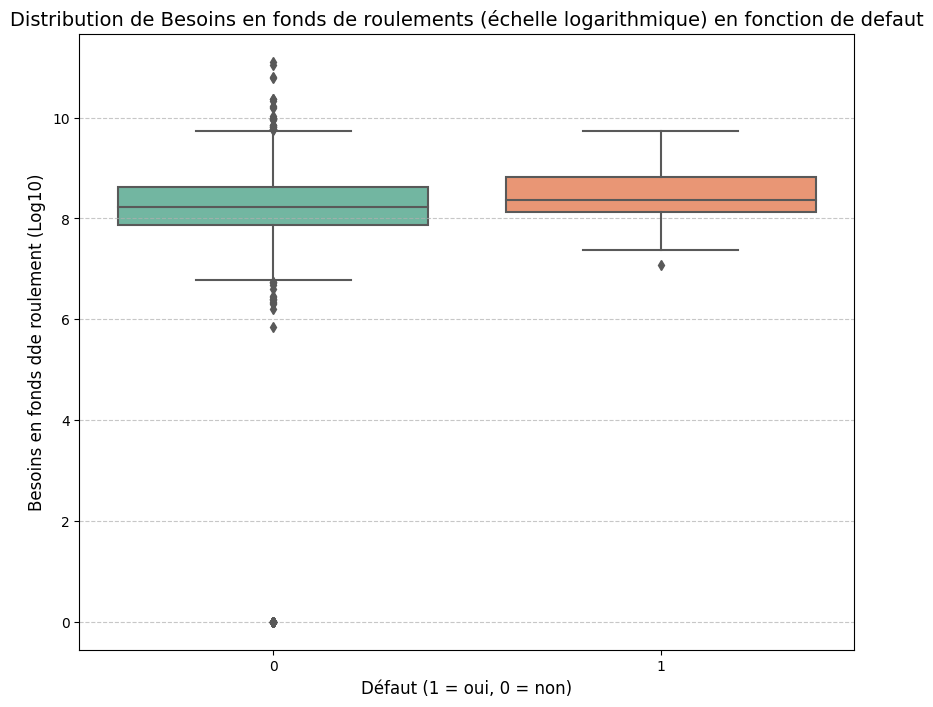

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='defaut', y=df['BESOIN_FONDS_ROULEMENT'].apply(lambda x: np.log10(max(x, 1))), data=df, palette='Set2')

plt.title("Distribution de Besoins en fonds de roulements (échelle logarithmique) en fonction de defaut", fontsize=14)
plt.xlabel("Défaut (1 = oui, 0 = non)", fontsize=12)
plt.ylabel("Besoins en fonds dde roulement (Log10)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

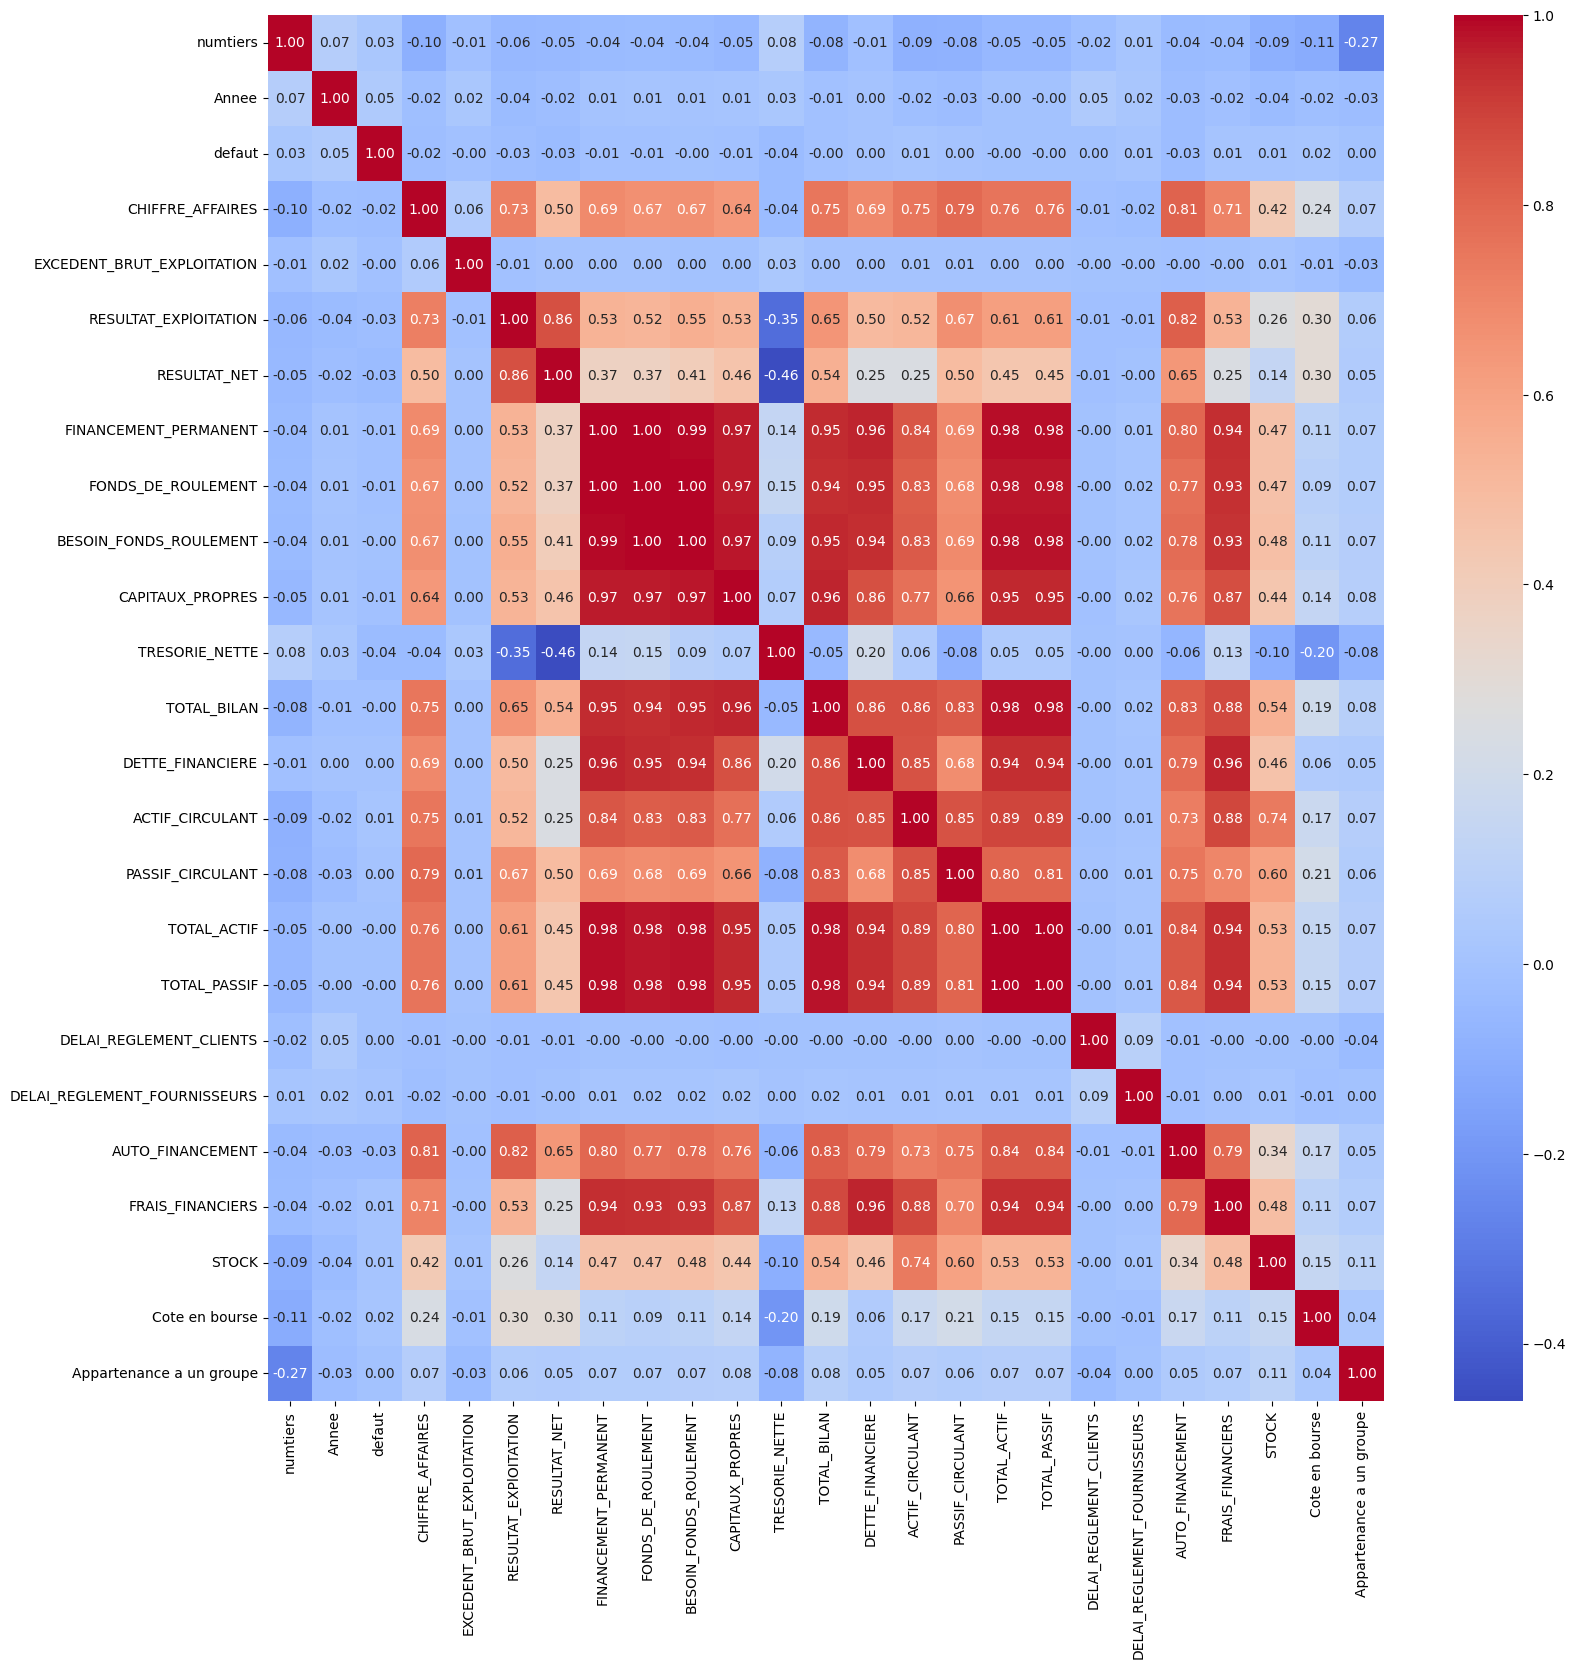

In [ ]:
df_numeric= df.select_dtypes(include=['number'])
corr_matrix=df_numeric.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

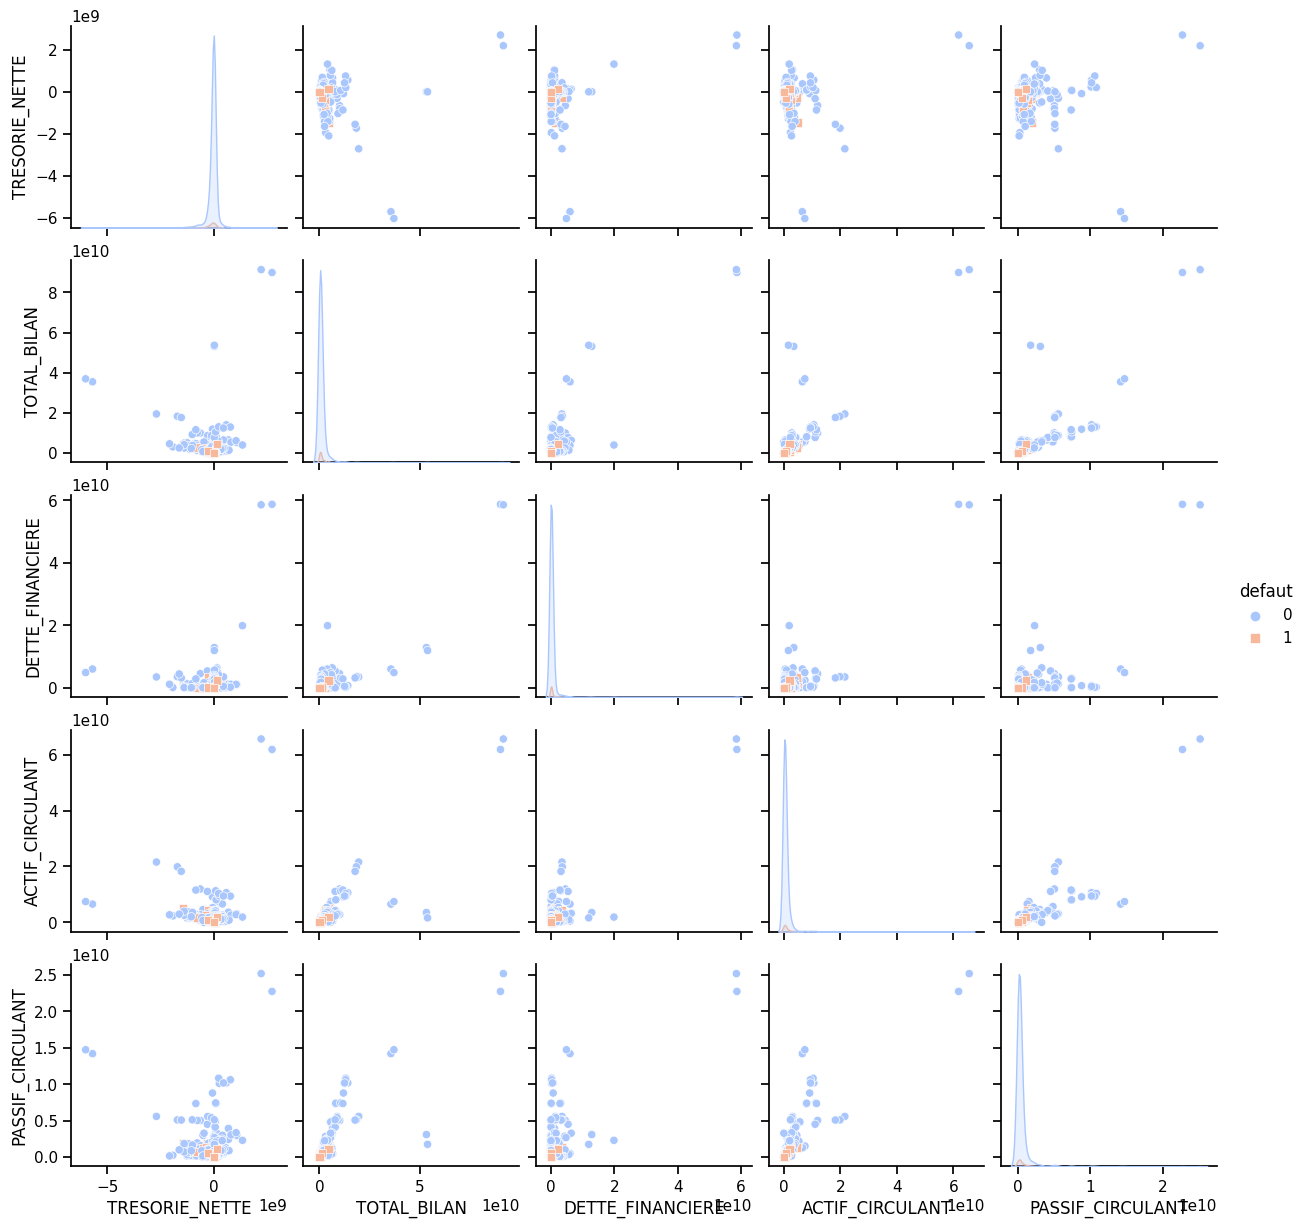

In [ ]:
df_subset = df.iloc[:, 14:19]
df_subset['defaut'] = df['defaut']
sns.pairplot(df_subset, hue='defaut', markers=["o", "s"], palette="coolwarm")
plt.show()

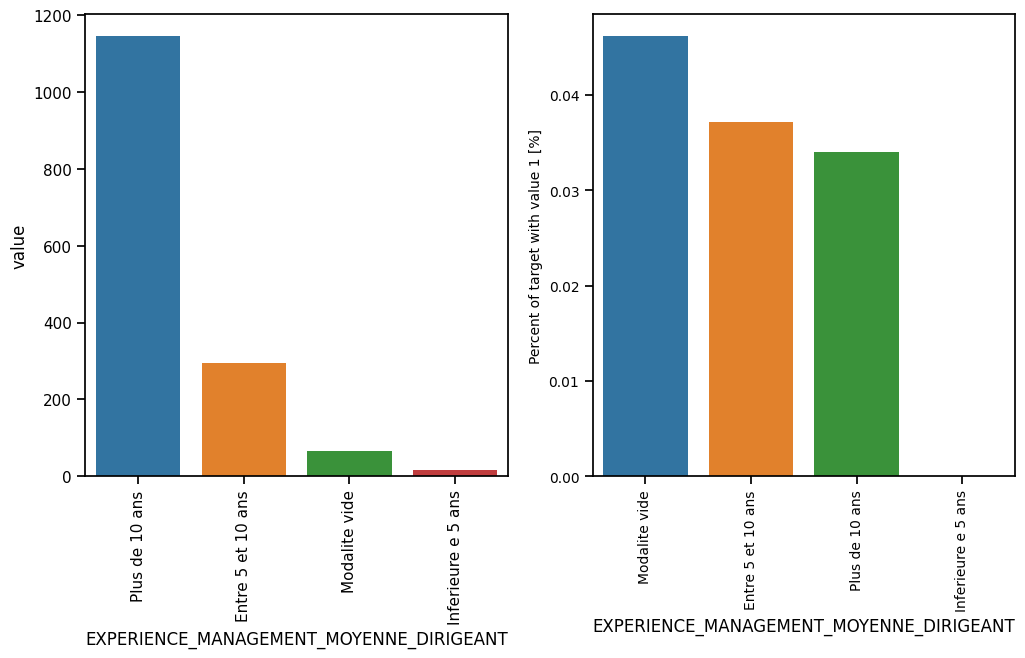

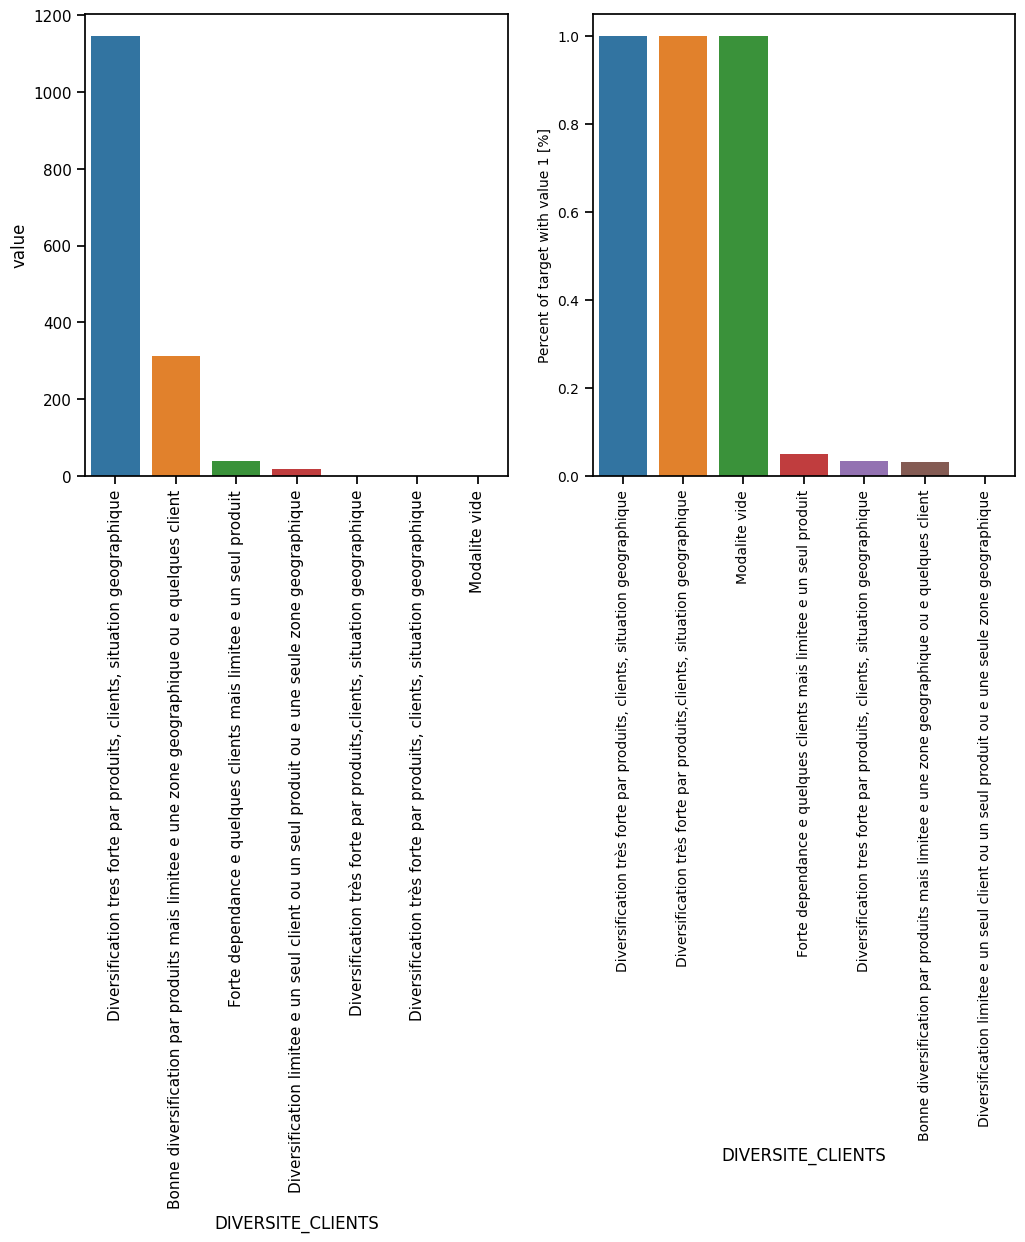

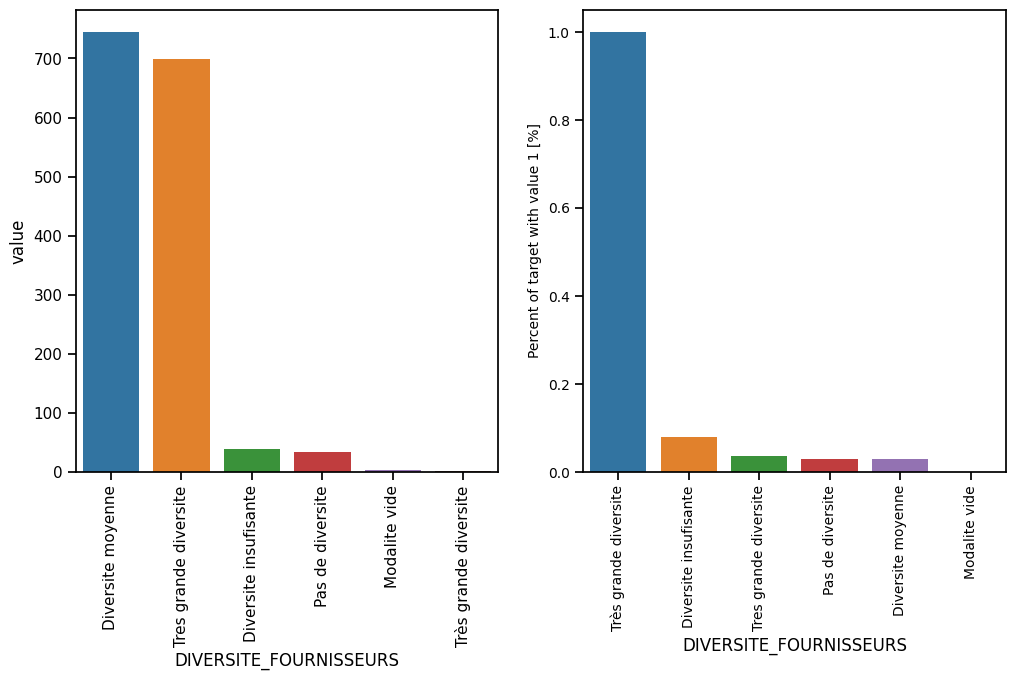

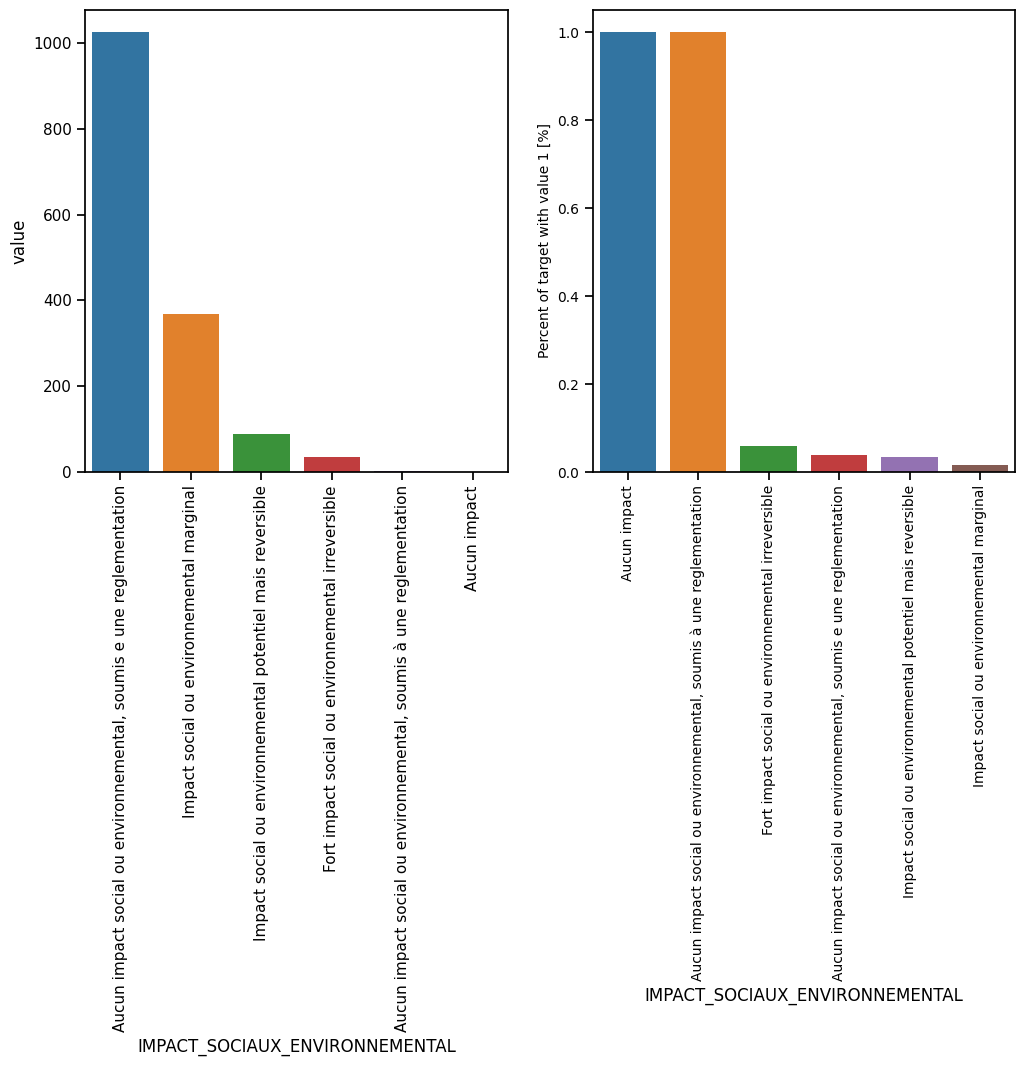

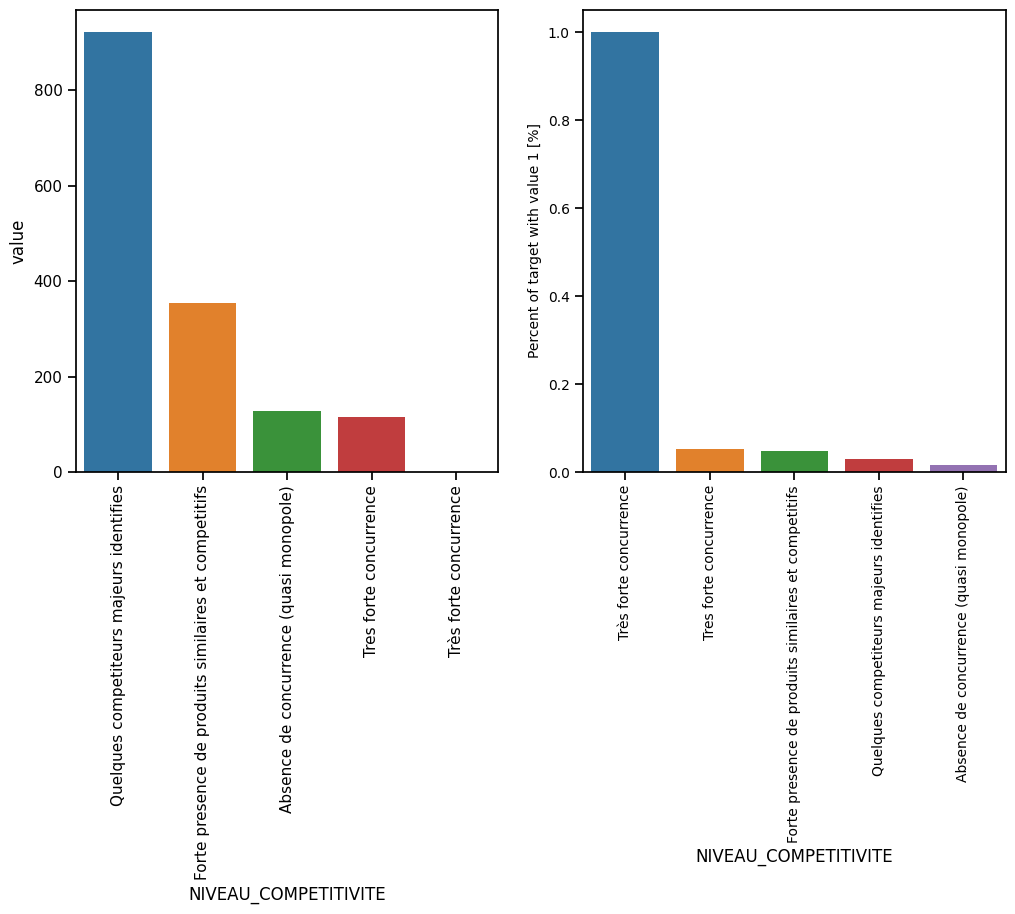

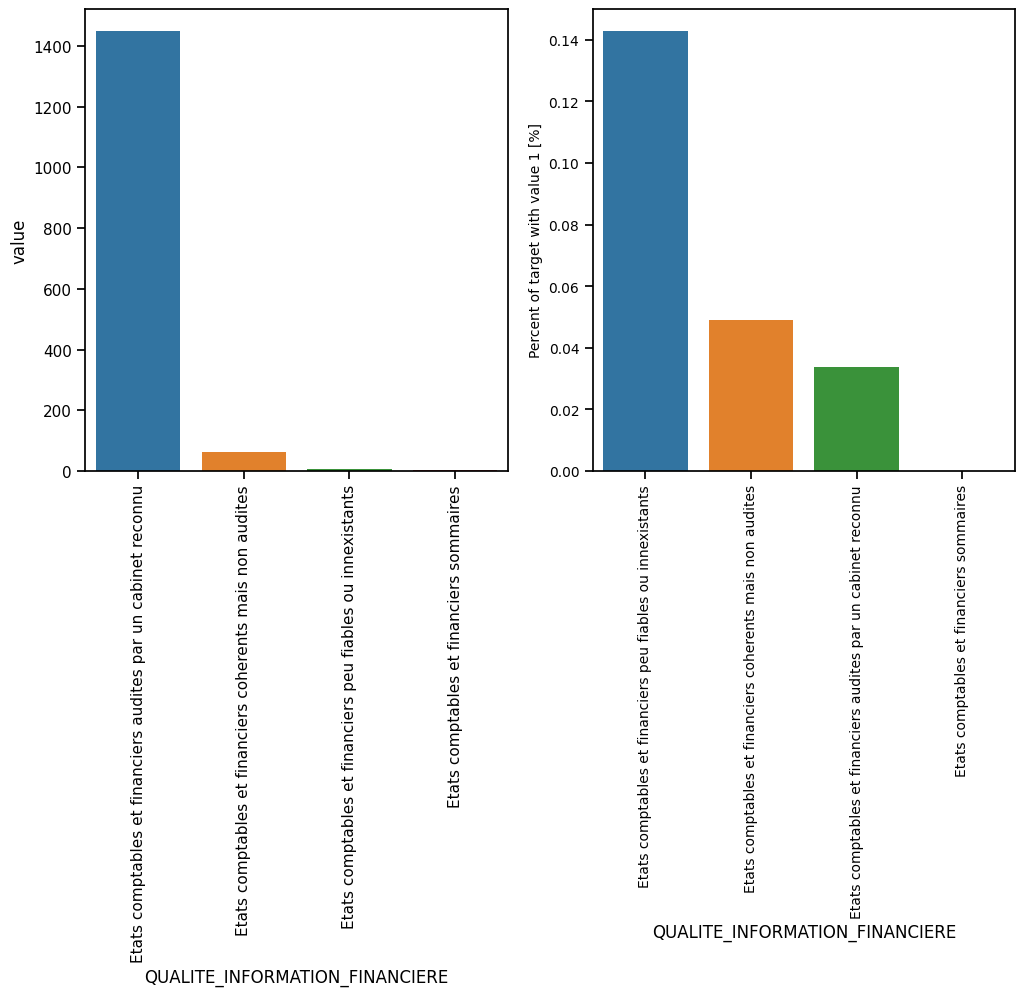

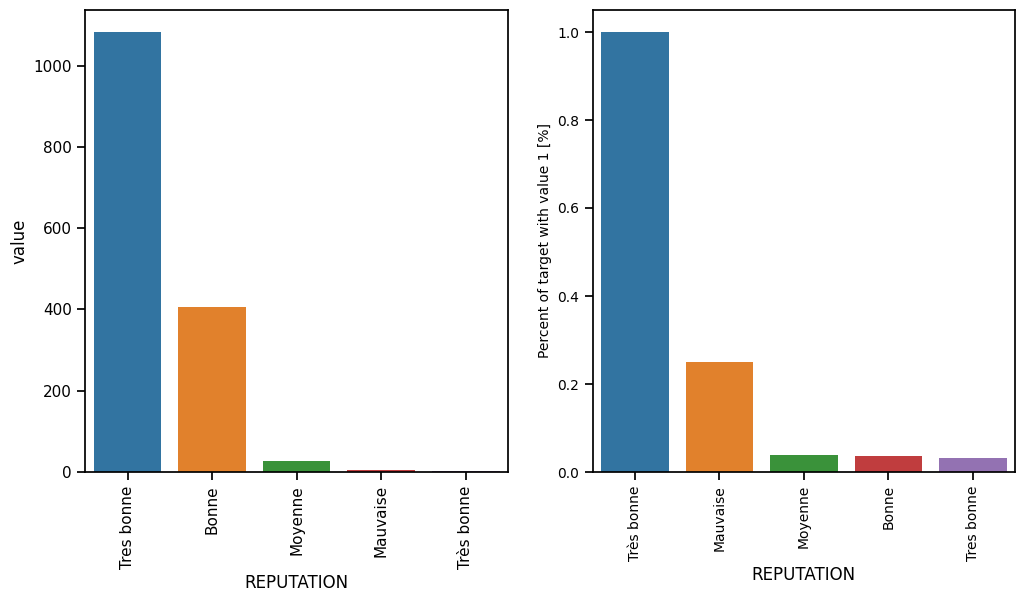

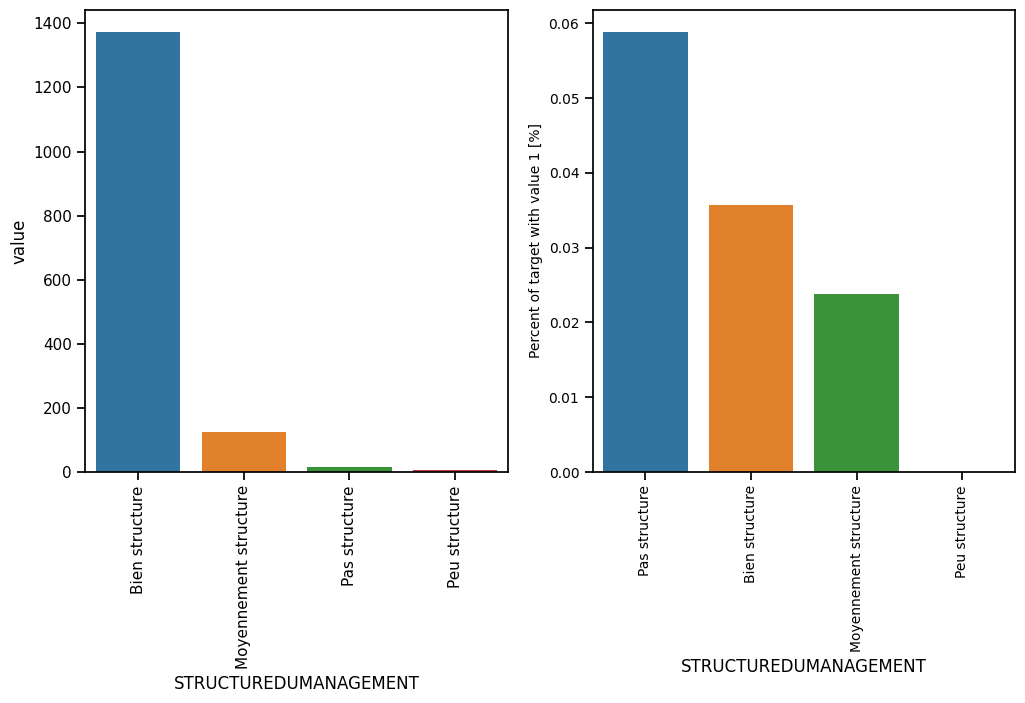

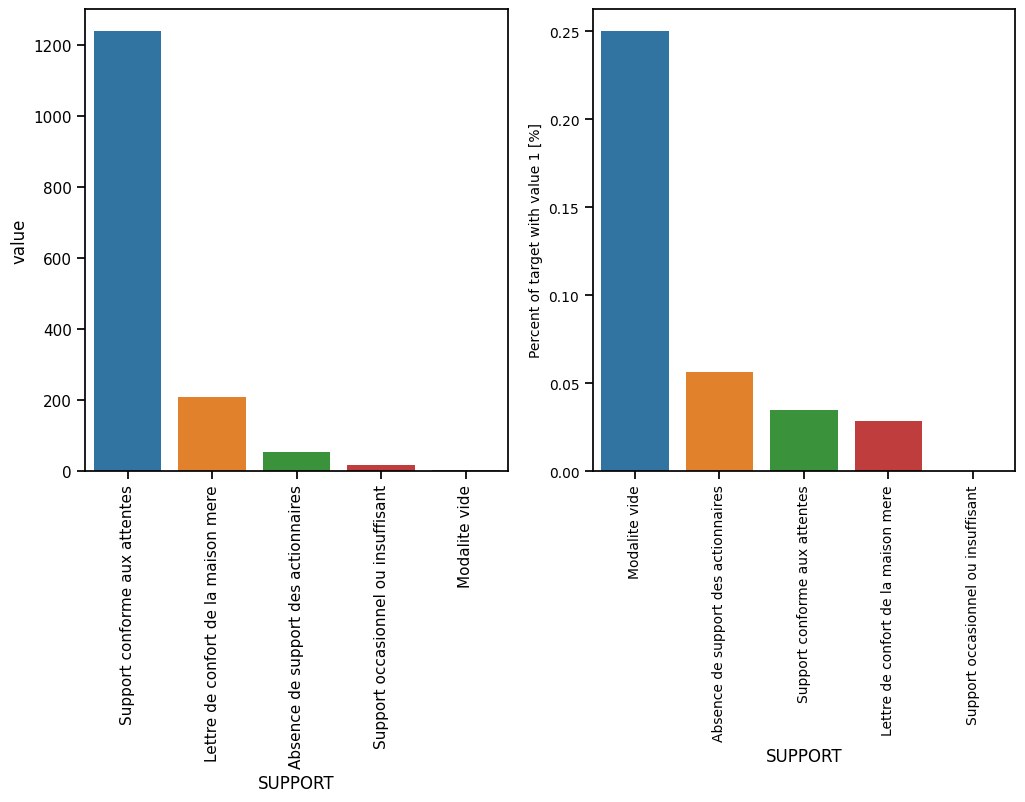

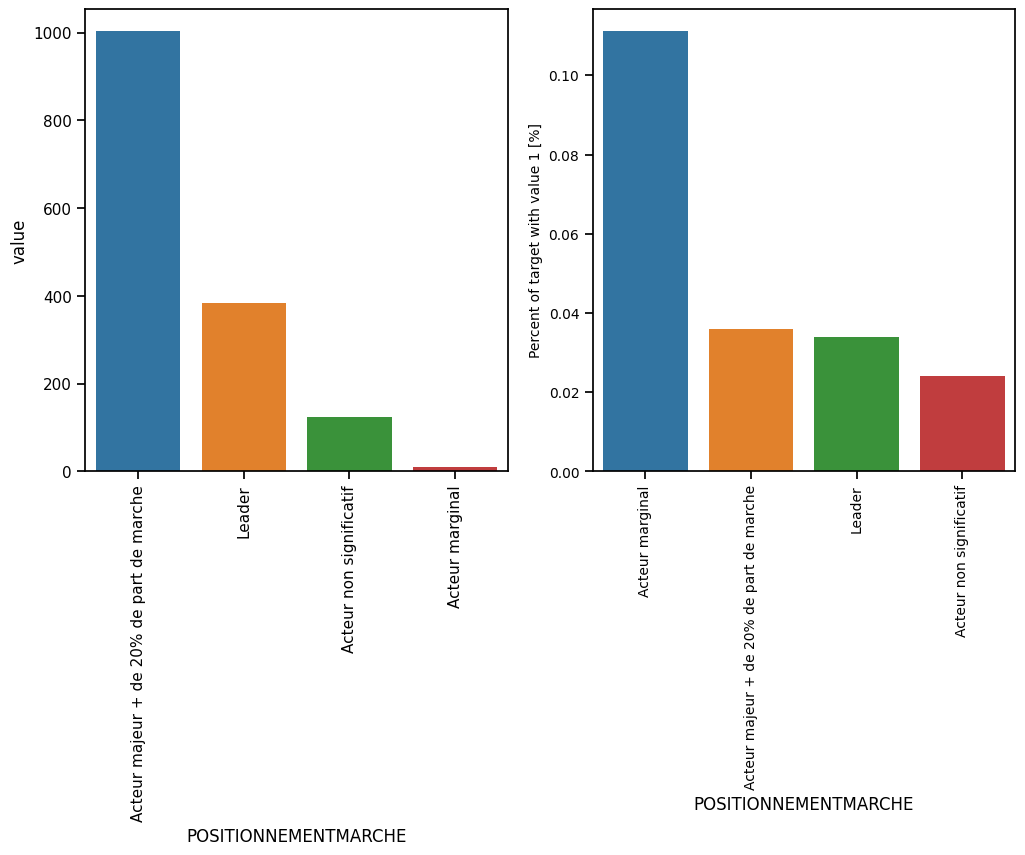

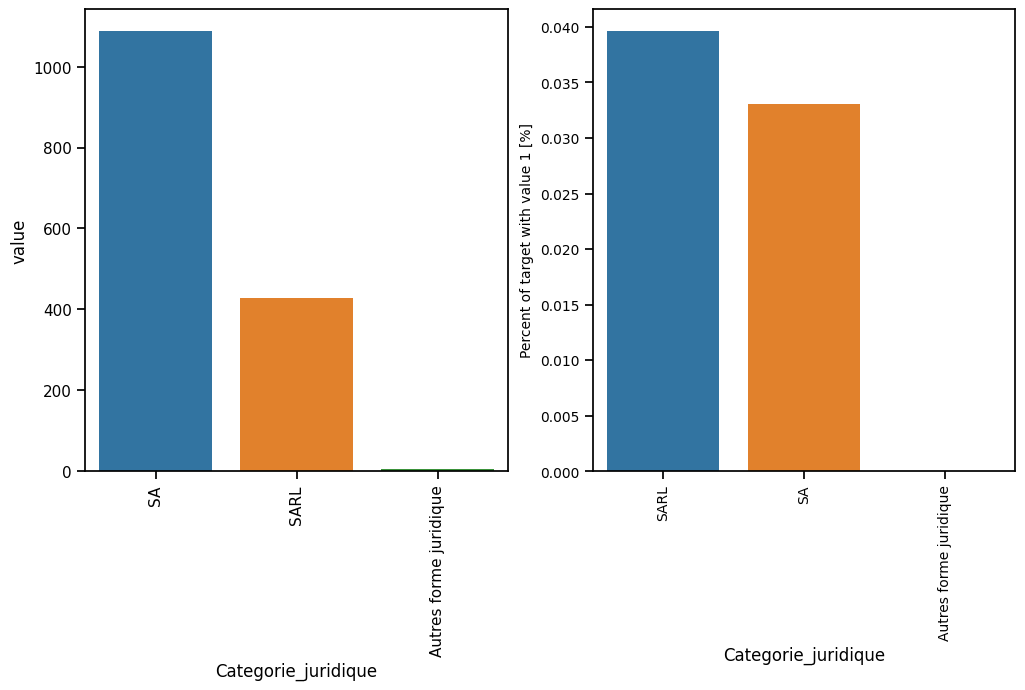

In [ ]:
for feature in df.iloc[:, 26:37]:
    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index, 'value': temp.values})
    cat_perc = df[[feature, 'defaut']].groupby([feature], as_index=False).mean()
    cat_perc.sort_values(by='defaut', ascending=False, inplace=True)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x=feature, y="value", data=df1)
    s.set_xticklabels(s.get_xticklabels(), rotation=90)

    s = sns.barplot(ax=ax2, x=feature, y='defaut', data=cat_perc)
    s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

**Imputing 'Modalite vide' using the "most frequent" strategy**

In [ ]:
for col in df.columns[26:37]:
    mode_value = df[col].mode()[0]
    df[col] = df[col].replace('Modalite vide', mode_value)

**Turnning date_columns into age_columns**

In [ ]:
date_reference = pd.to_datetime('2019-01-01')
df = df.assign(
    age_tiers=(date_reference - df['DATE_DE_CREATION_TIERS']).dt.days // 365,
    age_entreprise=(date_reference - df['DATE_DE_CREATION_ENTREP']).dt.days // 365
).drop(columns=['DATE_DE_CREATION_TIERS', 'DATE_DE_CREATION_ENTREP'])

<ipython-input-29-a9027860d702>:5: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  age_defaults.plot.pie(autopct='%1.1f%%', colors=palette, startangle=90, cmap="Set3")


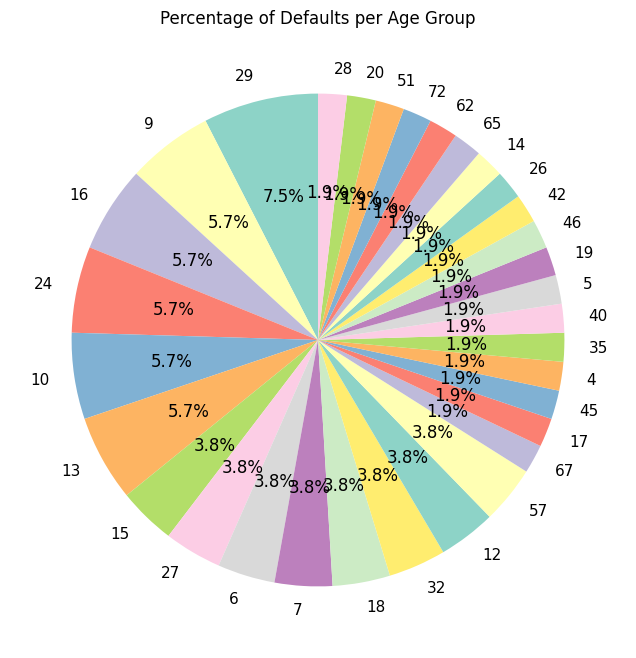

In [ ]:
df_defaults = df[df['defaut'] == 1]
age_defaults = df_defaults['age_entreprise'].value_counts(normalize=True) * 100
palette = sns.color_palette("Set3", len(age_defaults))
plt.figure(figsize=(8, 8))
age_defaults.plot.pie(autopct='%1.1f%%', colors=palette, startangle=90, cmap="Set3")
plt.title('Percentage of Defaults per Age Group')
plt.ylabel('')
plt.show()

**Merging similar Modalities**

In [ ]:
def merge_modalities(df):
    # Regroupement des modalités pour chaque variable
    df['EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT'] = df['EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT'].replace({
        'Entre 5 et 10 ans': 'Expérience significative',
        'Plus de 10 ans': 'Expérience significative',
        'Inferieure e 5 ans': 'Expérience faible'
    })

    df['DIVERSITE_CLIENTS'] = df['DIVERSITE_CLIENTS'].replace({
        'Diversification tres forte par produits, clients, situation geographique': 'Diversification forte',
        'Diversification très forte par produits, clients, situation geographique': 'Diversification forte',
        'Bonne diversification par produits mais limitee e une zone geographique ou e quelques client': 'Diversification modérée',
        'Forte dependance e quelques clients mais limitee e un seul produit': 'Diversification modérée',
        'Diversification limitee e un seul client ou un seul produit ou e une seule zone geographique': 'Diversification faible'
    })

    df['DIVERSITE_FOURNISSEURS'] = df['DIVERSITE_FOURNISSEURS'].replace({
        'Diversite insufisante': 'Diversité faible',
        'Pas de diversite': 'Diversité faible',
        'Diversite moyenne': 'Diversité moyenne',
        'Tres grande diversite': 'Diversité grande',
        'Très grande diversite': 'Diversité grande'
    })

    df['IMPACT_SOCIAUX_ENVIRONNEMENTAL'] = df['IMPACT_SOCIAUX_ENVIRONNEMENTAL'].replace({
        'Aucun impact': 'Impact nul',
        'Aucun impact social ou environnemental, soumis e une reglementation': 'Impact nul',
        'Impact social ou environnemental marginal': 'Impact faible',
        'Impact social ou environnemental potentiel mais reversible': 'Impact faible',
        'Fort impact social ou environnemental irreversible': 'Impact fort'
    })

    df['NIVEAU_COMPETITIVITE'] = df['NIVEAU_COMPETITIVITE'].replace({
        'Absence de concurrence (quasi monopole)': 'Concurrence faible',
        'Quelques competiteurs majeurs identifies': 'Concurrence faible',
        'Forte presence de produits similaires et competitifs': 'Concurrence forte',
        'Tres forte concurrence': 'Concurrence forte',
        'Très forte concurrence': 'Concurrence forte'
    })

    df['QUALITE_INFORMATION_FINANCIERE'] = df['QUALITE_INFORMATION_FINANCIERE'].replace({
        'Etats comptables et financiers audites par un cabinet reconnu': 'Qualité financière élevée',
        'Etats comptables et financiers coherents mais non audites': 'Qualité financière élevée',
        'Etats comptables et financiers peu fiables ou innexistants': 'Qualité financière faible',
        'Etats comptables et financiers sommaires': 'Qualité financière faible'
    })

    df['REPUTATION'] = df['REPUTATION'].replace({
        'Bonne': 'Bonne réputation',
        'Tres bonne': 'Bonne réputation',
        'Moyenne': 'Réputation moyenne/faible',
        'Mauvaise': 'Réputation moyenne/faible'
    })

    df['STRUCTUREDUMANAGEMENT'] = df['STRUCTUREDUMANAGEMENT'].replace({
        'Bien structure': 'Structure organisationnelle élevée',
        'Moyennement structure': 'Structure organisationnelle élevée',
        'Pas structure': 'Structure organisationnelle faible',
        'Peu structure': 'Structure organisationnelle faible'
    })

    df['SUPPORT'] = df['SUPPORT'].replace({
        'Absence de support des actionnaires': 'Support limité',
        'Support occasionnel ou insuffisant': 'Support limité',
        'Lettre de confort de la maison mere': 'Support adéquat',
        'Support conforme aux attentes': 'Support adéquat'
    })

    return df

In [ ]:
df = merge_modalities(df)

**V-Cramer test for qualitative variables**

In [ ]:
def v_cramer(var1, var2):
    contingency_table = pd.crosstab(var1, var2)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    k = min(contingency_table.shape)
    return np.sqrt(chi2 / (n * (k - 1)))

qualitative_vars = df.select_dtypes(include=['object', 'category']).columns

results = {}
for col in qualitative_vars:
    v = v_cramer(df["defaut"], df[col])
    results[col] = v

print("V de Cramer pour chaque variable qualitative avec 'defaut':")
for var, value in results.items():
    print(f"{var}: {value:.2f}")

V de Cramer pour chaque variable qualitative avec 'defaut':
NUMTIERS_ANNEE: 1.00
EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT: 0.02
DIVERSITE_CLIENTS: 0.19
DIVERSITE_FOURNISSEURS: 0.04
IMPACT_SOCIAUX_ENVIRONNEMENTAL: 0.20
NIVEAU_COMPETITIVITE: 0.05
QUALITE_INFORMATION_FINANCIERE: 0.00
REPUTATION: 0.14
STRUCTUREDUMANAGEMENT: 0.00
SUPPORT: 0.06
POSITIONNEMENTMARCHE: 0.04
Categorie_juridique: 0.02
Secteurs: 0.16


In [ ]:
selected_categorical_vars = [var for var, value in results.items() if value >= 0.1]
numerical_vars = df.select_dtypes(include=['number']).columns
df = df[list(numerical_vars) + selected_categorical_vars]

On élimine les variables ayant des valeurs de test de V-Cramér avec la variable défaut inférieures à 0.1

**Winsorization**

In [ ]:
columns_to_winsorize = df.columns[3:23]
lower_limit = 0.05
upper_limit = 0.05
for col in columns_to_winsorize:
    df[col] = winsorize(df[col], limits=(lower_limit, upper_limit))

In [ ]:
selected_columns = df.iloc[:, 3:23]
correlation_matrix = selected_columns.corr()
sum_correlations = correlation_matrix.apply(lambda row: row.sum() - 1, axis=1)
result_df = pd.DataFrame({
        "Variable": selected_columns.columns,
        "Sum_of_Correlations": sum_correlations
})
print(result_df)

                                                  Variable  \
CHIFFRE_AFFAIRES                          CHIFFRE_AFFAIRES   
EXCEDENT_BRUT_EXPLOITATION      EXCEDENT_BRUT_EXPLOITATION   
RESULTAT_EXPlOITATION                RESULTAT_EXPlOITATION   
RESULTAT_NET                                  RESULTAT_NET   
FINANCEMENT_PERMANENT                FINANCEMENT_PERMANENT   
FONDS_DE_ROULEMENT                      FONDS_DE_ROULEMENT   
BESOIN_FONDS_ROULEMENT              BESOIN_FONDS_ROULEMENT   
CAPITAUX_PROPRES                          CAPITAUX_PROPRES   
TRESORIE_NETTE                              TRESORIE_NETTE   
TOTAL_BILAN                                    TOTAL_BILAN   
DETTE_FINANCIERE                          DETTE_FINANCIERE   
ACTIF_CIRCULANT                            ACTIF_CIRCULANT   
PASSIF_CIRCULANT                          PASSIF_CIRCULANT   
TOTAL_ACTIF                                    TOTAL_ACTIF   
TOTAL_PASSIF                                  TOTAL_PASSIF   
DELAI_RE

On élimine les 3 variablels qui ont la somme de corrélations la plus élevée

In [ ]:
columns_to_delete = ['TOTAL_ACTIF', 'TOTAL_PASSIF', 'TOTAL_BILAN']
df = df.drop(columns=columns_to_delete)

**Preparation for Discretization of variables**

In [ ]:
columns_to_include = list(df.columns[0:20]) + [df.columns[21], df.columns[22]]
df_db = df[columns_to_include]

In [ ]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_db.iloc[:, 3:23])

Making a function to find the best DBSCAN parameters using MDL-inspired heuristics

In [ ]:
def find_best_dbscan_params(data):
    neighbors = NearestNeighbors(n_neighbors=10)
    neighbors_fit = neighbors.fit(data)
    distances, indices = neighbors_fit.kneighbors(data)

    distances = np.sort(distances[:, -1])
    eps = np.percentile(distances, 90)

    min_samples = 5
    return eps, min_samples

In [ ]:
best_eps, best_min_samples = find_best_dbscan_params(data_scaled)

Apply DBSCAN

In [ ]:
# Perform DBSCAN clustering
clustering = DBSCAN(eps=best_eps, min_samples=best_min_samples).fit(data_scaled)
labels = clustering.labels_

df_c = df_db.copy()
df_c['Cluster'] = labels

cluster_ranges = {}
for cluster in sorted(df_c['Cluster'].unique()):
    if cluster == -1:
        cluster_name = "Noise"
    else:
        cluster_name = f"Cluster {cluster + 1}"

    cluster_data = df_c[df_c['Cluster'] == cluster]
    cluster_ranges[cluster_name] = {
        col: (cluster_data[col].min(), cluster_data[col].max())
        for col in df_c.columns if col != 'Cluster'
    }

# Convert continuous variables to discrete classes based on cluster assignments
for col in df_c.columns[3:22]:
    df_c[col] = df_c['Cluster']

In [ ]:
cols_to_add = [col for col in df.columns if col not in df_c.columns]
df_cat = pd.concat([df_c, df[cols_to_add]], axis=1)

In [ ]:
df_cat = df_cat.drop('Cluster', axis=1)

**Information Value**

Function to calculate WoE and IV for a given variable

In [ ]:
def calculate_woe_iv(df, feature, target):
    # Create a cross-tabulation of feature and target
    crosstab = pd.crosstab(df[feature], df[target], normalize='columns')
    crosstab = crosstab.rename(columns={0: 'bad', 1: 'good'})

    crosstab['bad'] = crosstab['bad'].replace(0, 0.0001)
    crosstab['good'] = crosstab['good'].replace(0, 0.0001)

    # Calculate WoE for each category
    crosstab['woe'] = np.log(crosstab['good'] / crosstab['bad'])

    # Calculate IV
    crosstab['iv'] = (crosstab['good'] - crosstab['bad']) * crosstab['woe']

    # Return the sum of IV for the feature
    iv = crosstab['iv'].sum()
    return iv

In [ ]:
iv_dict = {}
for col in df_cat.columns[3:29]:
    if df_cat[col].dtype == 'float64':
        df_cat[col] = df_cat[col].astype(int)

    iv_dict[col] = calculate_woe_iv(df_cat, col, 'defaut')

In [ ]:
iv_df = pd.DataFrame(list(iv_dict.items()), columns=['Feature', 'IV'])
print(iv_df)

                           Feature        IV
0                 CHIFFRE_AFFAIRES  0.161681
1       EXCEDENT_BRUT_EXPLOITATION  0.161681
2            RESULTAT_EXPlOITATION  0.161681
3                     RESULTAT_NET  0.161681
4            FINANCEMENT_PERMANENT  0.161681
5               FONDS_DE_ROULEMENT  0.161681
6           BESOIN_FONDS_ROULEMENT  0.161681
7                 CAPITAUX_PROPRES  0.161681
8                   TRESORIE_NETTE  0.161681
9                 DETTE_FINANCIERE  0.161681
10                 ACTIF_CIRCULANT  0.161681
11                PASSIF_CIRCULANT  0.161681
12         DELAI_REGLEMENT_CLIENTS  0.161681
13    DELAI_REGLEMENT_FOURNISSEURS  0.161681
14                AUTO_FINANCEMENT  0.161681
15                FRAIS_FINANCIERS  0.161681
16                           STOCK  0.161681
17        Appartenance a un groupe  0.161681
18                  NUMTIERS_ANNEE  0.161681
19                  Cote en bourse  0.008281
20               DIVERSITE_CLIENTS  0.259776
21  IMPACT

In [ ]:
iv_threshold = 0.1
features_above_threshold = iv_df[iv_df['IV'] >= iv_threshold]['Feature']
df2 = df[features_above_threshold]

On sélectionne les variables dont l'IV (Information Value) est supérieure ou égale à 0,1

In [ ]:
df2 = pd.concat([df_cat.iloc[:, :3], df2], axis=1)

**Anova Test**

In [ ]:
variables = df2.columns[3:20]
target = 'defaut'

anova_results = {}

for var in variables:
    group0 = df2[df2[target] == 0][var]
    group1 = df2[df2[target] == 1][var]

    f_stat, p_value = stats.f_oneway(group0, group1)
    anova_results[var] = {'F-Statistic': f_stat, 'P-Value': p_value}

anova_results_df = pd.DataFrame(anova_results).T
anova_results_df = anova_results_df.reset_index().rename(columns={'index': 'Variable'})

In [ ]:
print(anova_results_df)

                        Variable  F-Statistic   P-Value
0               CHIFFRE_AFFAIRES     0.605044  0.436781
1     EXCEDENT_BRUT_EXPLOITATION     1.262431  0.261369
2          RESULTAT_EXPlOITATION     1.702902  0.192107
3                   RESULTAT_NET     3.887212  0.048836
4          FINANCEMENT_PERMANENT     3.622064  0.057207
5             FONDS_DE_ROULEMENT     2.882707  0.089740
6         BESOIN_FONDS_ROULEMENT     5.697857  0.017107
7               CAPITAUX_PROPRES     0.430120  0.512029
8                 TRESORIE_NETTE     9.152376  0.002526
9               DETTE_FINANCIERE     7.529557  0.006141
10               ACTIF_CIRCULANT     9.673845  0.001904
11              PASSIF_CIRCULANT     6.859964  0.008903
12       DELAI_REGLEMENT_CLIENTS     9.647097  0.001932
13  DELAI_REGLEMENT_FOURNISSEURS     3.225937  0.072679
14              AUTO_FINANCEMENT     1.813806  0.178253
15              FRAIS_FINANCIERS    10.451825  0.001252
16                         STOCK     3.931695  0

In [ ]:
relevant_vars = anova_results_df[anova_results_df['P-Value'] < 0.05]['Variable'].values
cols_to_include = list(df2.columns[:3]) + list(relevant_vars)+list(df2.columns[22:26])
df3 = df2[cols_to_include]

**Feature Engineering:Financial Ratios**

In [ ]:
required_columns = [
    'RESULTAT_NET', 'BESOIN_FONDS_ROULEMENT', 'TRESORIE_NETTE',
    'DETTE_FINANCIERE', 'ACTIF_CIRCULANT', 'PASSIF_CIRCULANT',
    'DELAI_REGLEMENT_CLIENTS', 'FRAIS_FINANCIERS', 'STOCK'
]

if all(col in df3.columns for col in required_columns):
    # 1. Ratios de Rentabilité
    df3['Marge_Nette'] = df3['RESULTAT_NET'] / (df3['ACTIF_CIRCULANT'] + df3['PASSIF_CIRCULANT'])
    df3['ROA'] = df3['RESULTAT_NET'] / df3['ACTIF_CIRCULANT']

    # 2. Ratios de Liquidité
    df3['Liquidite_Generale'] = df3['ACTIF_CIRCULANT'] / df3['PASSIF_CIRCULANT']
    df3['Liquidite_Immediate'] = df3['TRESORIE_NETTE'] / df3['PASSIF_CIRCULANT']

    # 3. Ratios d’Endettement
    df3['Endettement_Financier'] = df3['DETTE_FINANCIERE'] / (df3['ACTIF_CIRCULANT'] + df3['PASSIF_CIRCULANT'])
    df3['Autonomie_Financiere'] = (df3['ACTIF_CIRCULANT'] - df3['DETTE_FINANCIERE']) / (df3['ACTIF_CIRCULANT'] + df3['PASSIF_CIRCULANT'])

    # 4. Ratios de Gestion
    df3['Duree_Reglement'] = df3['DELAI_REGLEMENT_CLIENTS'] / df3['ACTIF_CIRCULANT']
    df3['Rotation_Stocks'] = df3['STOCK'] / (df3['ACTIF_CIRCULANT'] + df3['PASSIF_CIRCULANT'])

    # 5. Indicateurs de Trésorerie
    df3['Fonds_de_Roulement'] = df3['BESOIN_FONDS_ROULEMENT'] / df3['ACTIF_CIRCULANT']
    df3['Capacite_Remboursement'] = df3['DETTE_FINANCIERE'] / df3['RESULTAT_NET']

    # 6. Taux de frais financiers
    df3['Taux_Frais_Financiers'] = df3['FRAIS_FINANCIERS'] / df3['DETTE_FINANCIERE']

    print("Nouvelles colonnes ajoutées avec succès.")



Nouvelles colonnes ajoutées avec succès.


<ipython-input-67-bbac7347b10a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Marge_Nette'] = df3['RESULTAT_NET'] / (df3['ACTIF_CIRCULANT'] + df3['PASSIF_CIRCULANT'])
<ipython-input-67-bbac7347b10a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['ROA'] = df3['RESULTAT_NET'] / df3['ACTIF_CIRCULANT']
<ipython-input-67-bbac7347b10a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [ ]:
df3.replace([np.inf, -np.inf], np.nan, inplace=True)
df3.fillna(df3.mean(), inplace=True)

In [ ]:
df3 = df3.drop(df3.columns[3:11], axis=1)

#

**Label Encoding**

In [ ]:
df3 = df3.drop(df3.columns[3:11], axis=1)

In [ ]:
label_encoder = LabelEncoder()
cols_to_encode = df3.iloc[:,12:16]
for col in cols_to_encode.columns:
    df3[col] = label_encoder.fit_transform(df3[col])

<ipython-input-35-3ed1cca91476>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[col] = label_encoder.fit_transform(df3[col])
<ipython-input-35-3ed1cca91476>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[col] = label_encoder.fit_transform(df3[col])
<ipython-input-35-3ed1cca91476>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

**Standardization**

In [ ]:
float_columns = df3.select_dtypes(include=['float64']).columns
scaler = StandardScaler()
df3[float_columns] = scaler.fit_transform(df3[float_columns])

In [ ]:
X=df3.copy()
X=X.drop('defaut',axis=1)
y=df3['defaut']

**Splitting the data into training and testing**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Accuracy on the test set: 0.7483588621444202


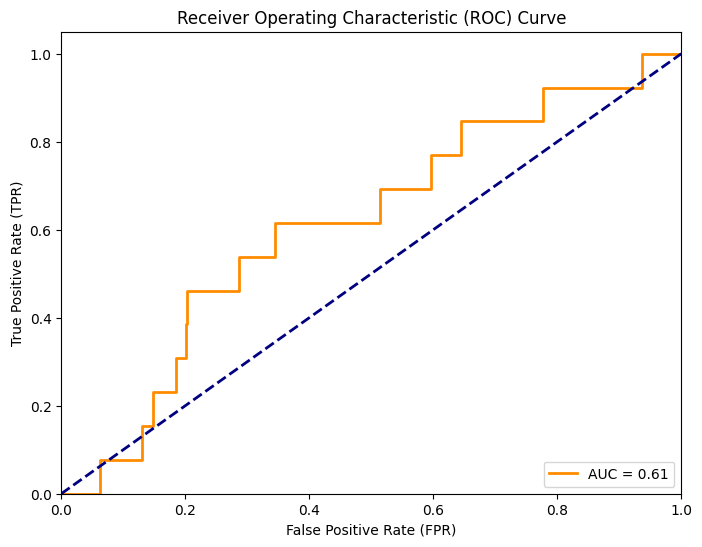

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train_smote, y_train_smote)
y_pred = model_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")
y_probs = model_lr.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy on the test set: 0.9562363238512035


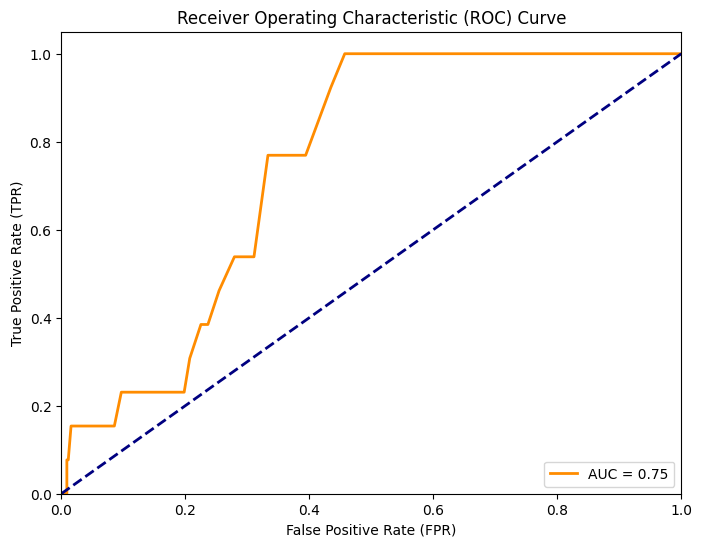

In [ ]:
model = RandomForestClassifier()
model.fit(X_train_smote, y_train_smote)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")
# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy on the test set: 0.8708971553610503


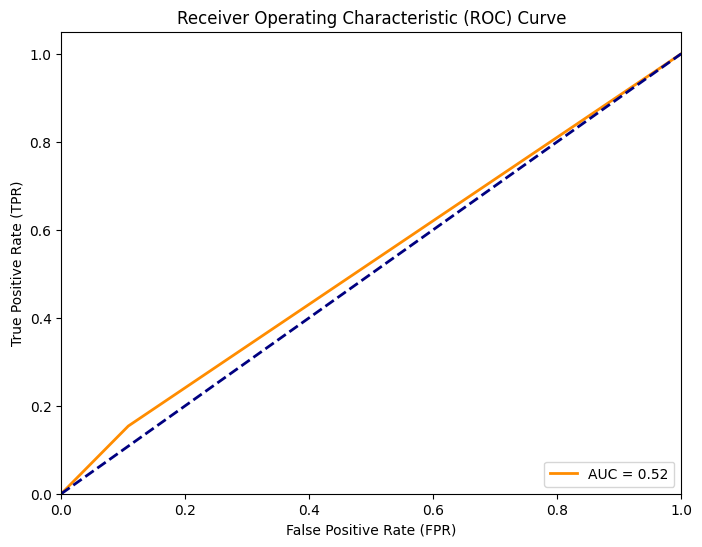

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_smote, y_train_smote)

y_pred = model_dt.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")

y_probs = model_dt.predict_proba(X_test)[:, 1]


# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

On retient la Forêt Aléatoire  car elle fournit les meilleurs resultats